# <center>Telecom Churn Case Study</center>

### Problem Statement
 

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

 

### Understanding and Defining Churn
There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).

 

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

 

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

 

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and southeast Asia, while postpaid is more common in Europe in North America.

 

This project is based on the Indian and Southeast Asian market.

 

### Definitions of Churn
There are various ways to define churn, such as:

- Revenue-based churn: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

 

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

 

- Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

 

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

 

In this project, you will use the usage-based definition to define churn.

 

### High-value Churn
In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

 

In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

 

### Understanding the Business Objective and the Data
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 


The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

 

### Understanding Customer Behaviour During Churn
Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

 

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Display 500 Rows and all Columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

In [2]:
# Supress the warnings
import warnings
warnings.filterwarnings('ignore')

In [141]:
# Read the csv file and store the dataset in a variable 'telecom_df'
telecom_df = pd.read_csv("telecom_churn_data.csv")

### Understanding the Data

In [142]:
# Explore the first 5 row of the dataset
telecom_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [143]:
# Find out the number of rows and columns of the dataset
telecom_df.shape

(99999, 226)

<font style='font-size:14px'>So there are 99999 rows and 226 columns in the dataset</font>

In [144]:
# Check the information of the dataset
telecom_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

<font style='font-size:14px'>We observe that most of the columns are numerical and some are non numeric and of type object. We also observe that the date columns are represented as object and hence we need to convert it to datetime values.</font>

In [145]:
# Get all the columns name that are of type object
datetime_cols= telecom_df.select_dtypes(include=['object']).columns
datetime_cols

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

<font style="color:green;font-size:14px">We observe that all the columns with object type are date related columns. In future we will drop it if not required in analysis.</font>

In [146]:
# Check the count mean max and other stastical attributes of the data
telecom_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [148]:
# Let is check the unique values in each columns
telecom_df.nunique().sort_values()

std_ic_t2o_mou_6                1
std_og_t2c_mou_8                1
std_og_t2c_mou_9                1
std_ic_t2o_mou_9                1
std_ic_t2o_mou_8                1
std_og_t2c_mou_7                1
std_ic_t2o_mou_7                1
last_date_of_month_9            1
std_og_t2c_mou_6                1
last_date_of_month_7            1
circle_id                       1
loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
last_date_of_month_8            1
last_date_of_month_6            1
night_pck_user_7                2
night_pck_user_8                2
night_pck_user_9                2
night_pck_user_6                2
fb_user_9                       2
fb_user_8                       2
fb_user_7                       2
fb_user_6                       2
monthly_2g_9                    5
monthly_2g_6                    5
monthly_2g_7                    6
monthly_2g_8                    6
monthly_3g_9                   11
monthly_3g_6  

Hence we observe that there are certain columns which has a unique value of 1 and hence no variance in its values. So this column will not be significant in analysis and hence we can go ahead and drop those columns.

In [149]:
# Get the list of columns with unique value as 1
unique_cols = [col for col in telecom_df.columns if telecom_df[col].nunique() == 1]
print("Columns with unique value of 1 are {0}".format(unique_cols))

Columns with unique value of 1 are ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


In [150]:
# Let us drop these unique value columns with unique value as 1
telecom_df.drop(unique_cols, axis=1, inplace = True)

In [151]:
# Let us check and validate the updated shape of the dataset
telecom_df.shape

(99999, 210)

### Handling the missing values

#### Check for missing values

In [152]:
# Let us check the percentage of missing values column-wise
round(((telecom_df.isnull().sum()/ len(telecom_df)) * 100), 2).sort_values(ascending=False)

max_rech_data_6             74.85
fb_user_6                   74.85
count_rech_3g_6             74.85
count_rech_2g_6             74.85
night_pck_user_6            74.85
arpu_3g_6                   74.85
total_rech_data_6           74.85
av_rech_amt_data_6          74.85
arpu_2g_6                   74.85
date_of_last_rech_data_6    74.85
arpu_3g_7                   74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
count_rech_2g_7             74.43
count_rech_3g_9             74.08
date_of_last_rech_data_9    74.08
count_rech_2g_9             74.08
fb_user_9                   74.08
total_rech_data_9           74.08
max_rech_data_9             74.08
night_pck_user_9            74.08
arpu_2g_9                   74.08
av_rech_amt_data_9          74.08
arpu_3g_9     

As we observe that there are certain columns having more than 70% missing values. Generally we would tend to drop these columns, but doing that may result in loss of some useful information as we have to derive the high value customers those who are in top 20% of those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

<b>Hence we will not drop these columns at this point and analyze further.</b>

In [153]:
# Handling missing values with respect to `data recharge` attributes
telecom_df[['date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6']].head(10)

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6
0,6/21/2014,1.0,252.0
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,6/4/2014,1.0,56.0
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


* In the column `date_of_last_rech_data_* ` which indicates the date of the last recharge made in any given month for data. It can be deduced that if the `total_rech_data_* ` and the `max_rech_data_* ` has missing values, the missing values in all the columns mentioned can be considered as a significant missing value.<br> 
* We will impute these missing values with 0<br>
* This missing values indicates that the customer has not done any recharge for data for the given months

##### Let us handle the missing values for the columns `total_rech_data_*`, `max_rech_data_*` for the month 6,7,8 and 9

In [154]:
# Defining a function for imputing the recharge related missing value with zero. This is iterative approach and time consuming
def imputewith_zero(total_rech_data, max_rech_data, date_of_last_rech_data):
    for i in range(len(telecom_df)):
        if pd.isnull((telecom_df[total_rech_data][i]) and (telecom_df[max_rech_data][i])):
            if pd.isnull(telecom_df[date_of_last_rech_data][i]):
                telecom_df[total_rech_data][i]=0
                telecom_df[max_rech_data][i]=0

In [155]:
# Define a function to check if both corresponding columns have null value and impute. This would be faster
def impute_if_equal_null(total_rech_data, max_rech_data, av_rech_amt_data):
    if(telecom_df[total_rech_data].isnull().sum()==0):
         print('No imputation required')
    elif (telecom_df[total_rech_data].isnull().equals(telecom_df[max_rech_data].isnull())):
        telecom_df[total_rech_data].fillna(0, inplace=True)
        telecom_df[max_rech_data].fillna(0, inplace=True)
        telecom_df[av_rech_amt_data ].fillna(0, inplace=True)
        print('Imputed successfully.')
    else:
        print('The Corresponding values for NULL values for this month are not equal hence using iterative process')
        print("Please wait iterative process would take some time to impute.......")
        imputewith_zero(total_rech_data, max_rech_data, date_of_last_rech_data)
        print('Imputed successfully.')

In [156]:
# Let us check the 'total_rech_data_6','max_rech_data_6','date_of_last_rech_data_6' columns
telecom_df[['total_rech_data_6','max_rech_data_6','date_of_last_rech_data_6']]

,total_rech_data_6,max_rech_data_6,date_of_last_rech_data_6
0,1.0,252.0,6/21/2014
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,1.0,56.0,6/4/2014
...,...,...,...
99994,NaN,NaN,NaN
99995,NaN,NaN,NaN
99996,2.0,25.0,6/13/2014
99997,3.0,202.0,6/17/2014


In [157]:
# Imputing the missing values for 'total_rech_data', 'max_rech_data' for month 6
impute_if_equal_null('total_rech_data_6', 'max_rech_data_6', 'av_rech_amt_data_6')

Imputed successfully.


In [158]:
# Imputing the missing values for 'total_rech_data', 'max_rech_data' for month 7
impute_if_equal_null('total_rech_data_7', 'max_rech_data_7', 'av_rech_amt_data_7')

Imputed successfully.


In [159]:
# Imputing the missing values for 'total_rech_data', 'max_rech_data' for month 6
impute_if_equal_null('total_rech_data_8', 'max_rech_data_8', 'av_rech_amt_data_8')

Imputed successfully.


In [160]:
# Imputing the missing values for 'total_rech_data', 'max_rech_data' for month 6
impute_if_equal_null('total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9')

Imputed successfully.


##### Let us now handle the missing values for the columns `count_rech_2g_*`,`count_rech_3g_*` for month 6,7,8 and 9

In [161]:
# Checking the related columns values
telecom_df[['count_rech_2g_6','count_rech_3g_6','total_rech_data_6']].head(10)

,count_rech_2g_6,count_rech_3g_6,total_rech_data_6
0,0.0,1.0,1.0
1,NaN,NaN,0.0
2,NaN,NaN,0.0
3,NaN,NaN,0.0
4,1.0,0.0,1.0
5,NaN,NaN,0.0
6,NaN,NaN,0.0
7,NaN,NaN,0.0
8,NaN,NaN,0.0
9,NaN,NaN,0.0


We observe from the above table that the values of 'total_rech_data_* ' for the months 6 and similarly for months 7,8 and 9 are actually the sum of the column 'count_rech_2g_* ' and the values of the coulmn 'count_rech_3g_* '.

So there is a multicollinearity issue observed. To reduce multicollinearity we can drop the columns 'count_rech_2g_* ' and 'count_rech_3g_* 'for each of the months 6 to 9.

In [162]:
# We can drop the following columns for months 6 till 9
count_rech_cols= ['count_rech_2g_6','count_rech_3g_6', 'count_rech_2g_7','count_rech_3g_7', \
                  'count_rech_2g_8','count_rech_3g_8', 'count_rech_2g_9','count_rech_3g_9']

In [163]:
# Drop the columns 'count_rech_2g_*' & 'count_rech_3g_*' for the months 6,7,8 and 9 
telecom_df.drop(count_rech_cols,axis=1, inplace=True)

In [164]:
# Let us check the updated dimensions of the dataset
telecom_df.shape

(99999, 202)

##### Let us now handle the columns  `arpu_3g_*`,`arpu_2g_*` for month 6,7,8 and 9

In [165]:
# Checking the related columns values
telecom_df[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].head(10)

,arpu_3g_6,arpu_2g_6,av_rech_amt_data_6
0,212.17,212.17,252.0
1,NaN,NaN,0.0
2,NaN,NaN,0.0
3,NaN,NaN,0.0
4,0.00,0.00,56.0
5,NaN,NaN,0.0
6,NaN,NaN,0.0
7,NaN,NaN,0.0
8,NaN,NaN,0.0
9,NaN,NaN,0.0


#### Check Correlations for each month

In [166]:
# Check correlation for month 6
telecom_df[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].corr()

,arpu_3g_6,arpu_2g_6,av_rech_amt_data_6
arpu_3g_6,1.000000,0.932232,0.809695
arpu_2g_6,0.932232,1.000000,0.834065
av_rech_amt_data_6,0.809695,0.834065,1.000000


In [167]:
# Check correlation for month 7
telecom_df[['arpu_3g_7','arpu_2g_7','av_rech_amt_data_7']].corr()

,arpu_3g_7,arpu_2g_7,av_rech_amt_data_7
arpu_3g_7,1.000000,0.930366,0.796131
arpu_2g_7,0.930366,1.000000,0.815933
av_rech_amt_data_7,0.796131,0.815933,1.000000


In [168]:
# Check correlation for month 8
telecom_df[['arpu_3g_8','arpu_2g_8','av_rech_amt_data_8']].corr()

,arpu_3g_8,arpu_2g_8,av_rech_amt_data_8
arpu_3g_8,1.000000,0.924925,0.787165
arpu_2g_8,0.924925,1.000000,0.805482
av_rech_amt_data_8,0.787165,0.805482,1.000000


In [169]:
# Check correlation for month 9
telecom_df[['arpu_3g_9','arpu_2g_9','av_rech_amt_data_9']].corr()

,arpu_3g_9,arpu_2g_9,av_rech_amt_data_9
arpu_3g_9,1.000000,0.852253,0.722932
arpu_2g_9,0.852253,1.000000,0.817815
av_rech_amt_data_9,0.722932,0.817815,1.000000


We observe from the table above that there is a high correlation between attributes `arpu_2g_*` and `arpu_3g_*` for each months 6 to 9 respectively to the attribute `av_rech_amt_data_*`<br><b> So we can safely drop the attributes `arpu_2g_*` and `arpu_3g_* `</b>.

In [170]:
# We can drop the following columns
arpu_cols= ['arpu_3g_6','arpu_2g_6','arpu_3g_7','arpu_2g_7', \
                 'arpu_3g_8','arpu_2g_8', 'arpu_3g_9','arpu_2g_9']

In [171]:
# Drop the columns 'arpu_2g_*' & 'arpu_3g_*' for the months 6,7,8 and 9 
telecom_df.drop(arpu_cols,axis=1, inplace=True)

In [172]:
# Let us check the updated dimensions of the dataset
telecom_df.shape

(99999, 194)

##### Let us now handle the other attributes with higher missing value percentage

In the dataset we observe that the columns `fb_user_*` and `night_pck_user_*` for each months 6 to 9 has a missing values of more than 50% which implies that it does not add any significant information to explain the data. So let us drop these columns.

In [173]:
# Dropping some of the other features that would not be of any use
other_cols=['fb_user_6','fb_user_7','fb_user_8','fb_user_9',\
            'night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9']

In [174]:
# Drop these other columns
telecom_df.drop(other_cols, axis=1, inplace=True)

In [175]:
# Let us check the updated dimensions of the dataset
telecom_df.shape

(99999, 186)

In [176]:
# Checkng the overall missing values in the dataset
((telecom_df.isnull().sum()/telecom_df.shape[0])*100).round(2).sort_values(ascending=False)

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_9    74.08
date_of_last_rech_data_8    73.66
og_others_9                  7.75
loc_og_t2f_mou_9             7.75
loc_og_t2t_mou_9             7.75
loc_ic_t2f_mou_9             7.75
std_ic_mou_9                 7.75
std_og_t2f_mou_9             7.75
loc_og_t2m_mou_9             7.75
loc_ic_mou_9                 7.75
std_og_t2m_mou_9             7.75
std_ic_t2f_mou_9             7.75
std_ic_t2t_mou_9             7.75
loc_og_t2c_mou_9             7.75
std_ic_t2m_mou_9             7.75
std_og_t2t_mou_9             7.75
loc_og_mou_9                 7.75
std_og_mou_9                 7.75
spl_ic_mou_9                 7.75
roam_og_mou_9                7.75
spl_og_mou_9                 7.75
loc_ic_t2t_mou_9             7.75
isd_og_mou_9                 7.75
roam_ic_mou_9                7.75
loc_ic_t2m_mou_9             7.75
isd_ic_mou_9                 7.75
onnet_mou_9                  7.75
ic_others_9   

### Data Preparation

#### Derived feature

Create a new column 'total_data_rech_amt_* ' which saves the total data recharge  amount calculated form the corresponding columns 'total_rech_data_* ' and 'av_rech_amt_data_* ' for the month 6 and 7 which is the <b>good phase</b>.

In [177]:
# Create the new column 'total_dat_rech_amt_*' and 'overall_rech_amt_*' for month 6 and 7
telecom_df['total_data_rech_amt_6'] = telecom_df['total_rech_data_6'] * telecom_df['av_rech_amt_data_6']
telecom_df['overall_rech_amt_6'] = telecom_df['total_data_rech_amt_6'] + telecom_df['total_rech_amt_6']

telecom_df['total_data_rech_amt_7'] = telecom_df['total_rech_data_7'] * telecom_df['av_rech_amt_data_7']
telecom_df['overall_rech_amt_7'] = telecom_df['total_data_rech_amt_7'] + telecom_df['total_rech_amt_7']

#### Filtering high value customers from the good phase

In [178]:
# Calculate the average recharge done in 6th and 7th month (June and July)
telecom_df['avg_rech_amt_6_7'] = (telecom_df['overall_rech_amt_6'] + telecom_df['overall_rech_amt_7'])/2

In [179]:
# Calculate 70th percentile value as per the criteria for high value customers
threshold = telecom_df['avg_rech_amt_6_7'].quantile(0.70)
print("The threshold value of 70th percentile value is: ",threshold)

The threshold value of 70th percentile value is:  478.0


In [180]:
# Filter the data to obtain the High Value Customer
telecom_df = telecom_df[telecom_df['avg_rech_amt_6_7'] >= threshold]

In [181]:
# Let us check the updated dimensions of the dataset
telecom_df.shape

(30001, 191)

In [182]:
# Check the shape of the updated dataset
telecom_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,overall_rech_amt_6,total_data_rech_amt_7,overall_rech_amt_7,avg_rech_amt_6_7
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58,252.0,614.0,252.0,504.0,559.0
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.

In [183]:
# Reset the index 
telecom_df = telecom_df.reset_index(drop=True)
telecom_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,overall_rech_amt_6,total_data_rech_amt_7,overall_rech_amt_7,avg_rech_amt_6_7
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58,252.0,614.0,252.0,504.0,559.0
1,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.

### Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes we need to use to tag churners are:

- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

After tagging churners, we will need to remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [184]:
telecom_df[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00
2,34.91,142.18,0.00,0.00
3,252.61,1031.53,0.00,0.00
4,127.48,127.63,13.93,314.74


In [185]:
# define function for tagging churners
def tagchurn(data):
    if((data.total_ic_mou_9 == 0) and (data.total_og_mou_9 == 0)\
       and (data.vol_2g_mb_9 == 0) and (data.vol_3g_mb_9 == 0)):
        return 1
    else:
        return 0
    

In [186]:
telecom_df['churn'] = telecom_df.apply(tagchurn, axis=1)

In [187]:
telecom_df['churn'].head()

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int64

In [188]:
# Check the churn and non churn percentage
churn_stats = (telecom_df['churn'].value_counts()/len(telecom_df))*100

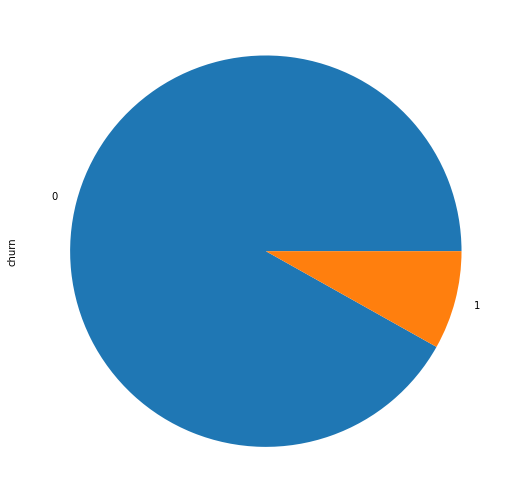

In [189]:
# Plot a piechart to visualize
plt.figure(figsize = (9, 9))
churn_stats.plot(kind="pie")
plt.show()

We observe that more than 90% of the customers do not churn, hence we have a situation of class imbalance here.
As the variable 'churn' is the target variable, hence all the columns with suffix _9 relating to this variable can be dropped from the dataset.

In [190]:
# Get all the columns of churn phase that will be dropped with prefix _9
churn_phase_cols = [col for col in telecom_df.columns if '_9' in col]

In [191]:
# display the columns to be dropped
churn_phase_cols

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9']

In [192]:
# Drop the selected churn phase columns
telecom_df.drop(churn_phase_cols, axis=1, inplace=True)

In [193]:
# Let us check the updated dimensions of the dataset
telecom_df.shape

(30001, 147)

Let us now check the collinearity

In [194]:
# Checking the correlation amongst the independent variables between -80 percent to +80%
telecom_df_corr = telecom_df.corr()
telecom_df_corr.loc[:,:] = np.tril(telecom_df_corr, k=-1)
telecom_df_corr = telecom_df_corr.stack()
telecom_df_corr = telecom_df_corr[(telecom_df_corr > 0.80) | (telecom_df_corr < -0.80)].sort_values(ascending=False)

In [195]:
# Display the filtered high correlations
telecom_df_corr

total_rech_amt_8    arpu_8                   0.955351
isd_og_mou_8        isd_og_mou_6             0.950194
                    isd_og_mou_7             0.949809
total_rech_amt_6    arpu_6                   0.946125
total_rech_amt_7    arpu_7                   0.943588
overall_rech_amt_7  total_data_rech_amt_7    0.934656
overall_rech_amt_6  total_data_rech_amt_6    0.934058
isd_og_mou_7        isd_og_mou_6             0.933275
sachet_2g_7         total_rech_data_7        0.904243
sachet_2g_6         total_rech_data_6        0.903875
sachet_2g_8         total_rech_data_8        0.900629
total_ic_mou_6      loc_ic_mou_6             0.895374
total_ic_mou_8      loc_ic_mou_8             0.893832
total_ic_mou_7      loc_ic_mou_7             0.883165
std_og_t2t_mou_8    onnet_mou_8              0.859913
std_og_t2t_mou_7    onnet_mou_7              0.859910
std_og_t2t_mou_6    onnet_mou_6              0.858997
avg_rech_amt_6_7    overall_rech_amt_7       0.856275
std_og_t2m_mou_7    offnet_m

In [196]:
# Get the list of columns that are highly collinear with other predictor variables, the criteria set for 85% collinearity
drop_cols =['total_rech_amt_8','isd_og_mou_8','isd_og_mou_7','sachet_2g_8','total_ic_mou_6', \
             'total_ic_mou_8','total_ic_mou_7','std_og_t2t_mou_6','std_og_t2t_mou_8',\
             'std_og_t2t_mou_7', 'std_og_t2m_mou_7','std_og_t2m_mou_8']

In [197]:
# Drop the listed columns
telecom_df.drop(drop_cols, axis=1, inplace=True)

In [198]:
# Let us check the updated dimensions of the dataset
telecom_df.shape

(30001, 135)

we can derive new variables from the column called 'aon' which denotes 'Age of Network'. This derived variable can explain the data with respect to churn.

In [199]:
# Create a new column called duration
telecom_df['duration'] = (telecom_df['aon']/30).round(0)

In [200]:
# Drop the column 'aon' Since we derived a new column from it.
telecom_df.drop('aon',axis=1, inplace=True)

In [201]:
# Let us now check for columns having more than or equal to 40% of missing data
df_ge_40 = ((telecom_df.isnull().sum()/ len(telecom_df)) * 100) >= 40
df_ge_40

mobile_number               False
arpu_6                      False
arpu_7                      False
arpu_8                      False
onnet_mou_6                 False
onnet_mou_7                 False
onnet_mou_8                 False
offnet_mou_6                False
offnet_mou_7                False
offnet_mou_8                False
roam_ic_mou_6               False
roam_ic_mou_7               False
roam_ic_mou_8               False
roam_og_mou_6               False
roam_og_mou_7               False
roam_og_mou_8               False
loc_og_t2t_mou_6            False
loc_og_t2t_mou_7            False
loc_og_t2t_mou_8            False
loc_og_t2m_mou_6            False
loc_og_t2m_mou_7            False
loc_og_t2m_mou_8            False
loc_og_t2f_mou_6            False
loc_og_t2f_mou_7            False
loc_og_t2f_mou_8            False
loc_og_t2c_mou_6            False
loc_og_t2c_mou_7            False
loc_og_t2c_mou_8            False
loc_og_mou_6                False
loc_og_mou_7  

In [202]:
# get the columns having greater than equal to 40% missing values
cols = list(df[df.values==True].index)
cols

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

So we get the 3 dates columns having more than 40% missing values, hence we can drop them as dates cannot be imputed generally.

In [203]:
# Drop the above dates columns
telecom_df.drop(cols, axis=1, inplace = True)

In [211]:
# Let us get the columns that do have null values
null_value_cols =telecom_df.columns[telecom_df.isna().any()].tolist()

In [212]:
# Let us look at the columns with null values for month 6
null_value_cols_6 = [col for col in null_value_cols if '_6' in col]
telecom_df[null_value_cols_6].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Empty DataFrame

In [213]:
# Let us look at the columns with null values for month 7
null_value_cols_7 = [col for col in null_value_cols if '_7' in col]
telecom_df[null_value_cols_7].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Empty DataFrame

In [214]:
# Let us look at the columns with null values for month 8
null_value_cols_8 = [col for col in null_value_cols if '_8' in col]
telecom_df[null_value_cols_8].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Empty DataFrame

From the above obesrvations of the months 6,7 and 8 we see that there are more than 28000 non-null observations out of 30001. Hence we have 500+ missing values for months 6,7 and 8 related attributes. 

We know that all these attributes point to the minutes of usage of incoming and/or outgoing calls (incoming/outgoing) made within the network or to the outside network.

So any missing value denotes that the minutes of usage is missing and needs to be imputed with 0 for all the months 6, 7 and 8.

<font style="color:green;font-size:14px"> From the above results we get an insight that towards the 8th month there is an increase in number of missing values indicating a probability that the services may have been stopped being used by customers also an indication that the particular customer is highly probable to churn.</font>

In [215]:
# Once again Get all the columns name that are of type object
datetime_cols= telecom_df.select_dtypes(include=['object']).columns
datetime_cols

Index([], dtype='object')

In [216]:
# Drop the date column as it is of no use in the analysis
telecom_df.drop(datetime_cols, axis=1, inplace=True)

In [217]:
# Impute the remaining missing values
for col in null_value_cols:
    telecom_df[col].fillna(0, inplace=True)

In [220]:
# Let us now check once again the missing values in the dataset
telecom_df.isnull().sum()

mobile_number            0
arpu_6                   0
arpu_7                   0
arpu_8                   0
onnet_mou_6              0
onnet_mou_7              0
onnet_mou_8              0
offnet_mou_6             0
offnet_mou_7             0
offnet_mou_8             0
roam_ic_mou_6            0
roam_ic_mou_7            0
roam_ic_mou_8            0
roam_og_mou_6            0
roam_og_mou_7            0
roam_og_mou_8            0
loc_og_t2t_mou_6         0
loc_og_t2t_mou_7         0
loc_og_t2t_mou_8         0
loc_og_t2m_mou_6         0
loc_og_t2m_mou_7         0
loc_og_t2m_mou_8         0
loc_og_t2f_mou_6         0
loc_og_t2f_mou_7         0
loc_og_t2f_mou_8         0
loc_og_t2c_mou_6         0
loc_og_t2c_mou_7         0
loc_og_t2c_mou_8         0
loc_og_mou_6             0
loc_og_mou_7             0
loc_og_mou_8             0
std_og_t2m_mou_6         0
std_og_t2f_mou_6         0
std_og_t2f_mou_7         0
std_og_t2f_mou_8         0
std_og_mou_6             0
std_og_mou_7             0
s

In [221]:
telecom_df.shape

(30001, 129)

### EDA

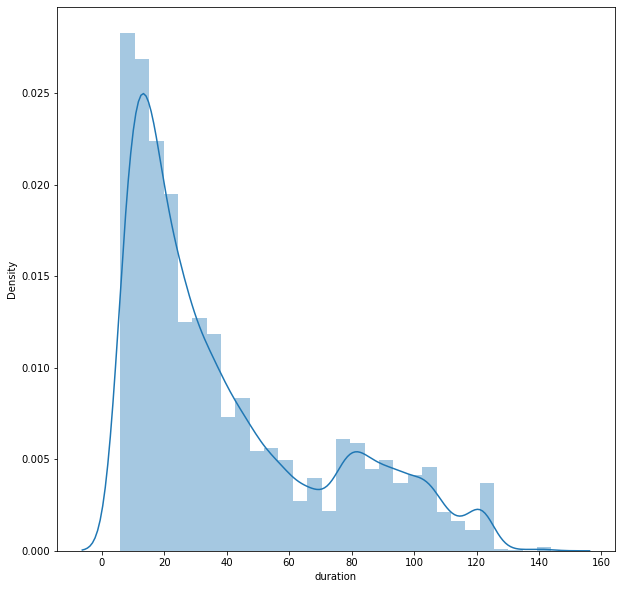

In [64]:
# Visaulize the distribution of he duration variable
plt.figure(figsize = (10, 10))
sns.distplot(telecom_df['duration'],bins=30)
plt.show()

We observe that the duration or tenure of the customer is right skewed and not uniform

#### Let us now construct a bar plot

In [65]:
# Set the intervals for the duration, labels and the bin size
duration_range = [0, 6, 12, 24, 60, 61]
label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
telecom_df['duration_range'] = pd.cut(telecom_df['duration'], duration_range, labels=label)
telecom_df['duration_range'].head()

0        2-5 Yrs
1        2-5 Yrs
2    6-12 Months
3        1-2 Yrs
4        1-2 Yrs
Name: duration_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

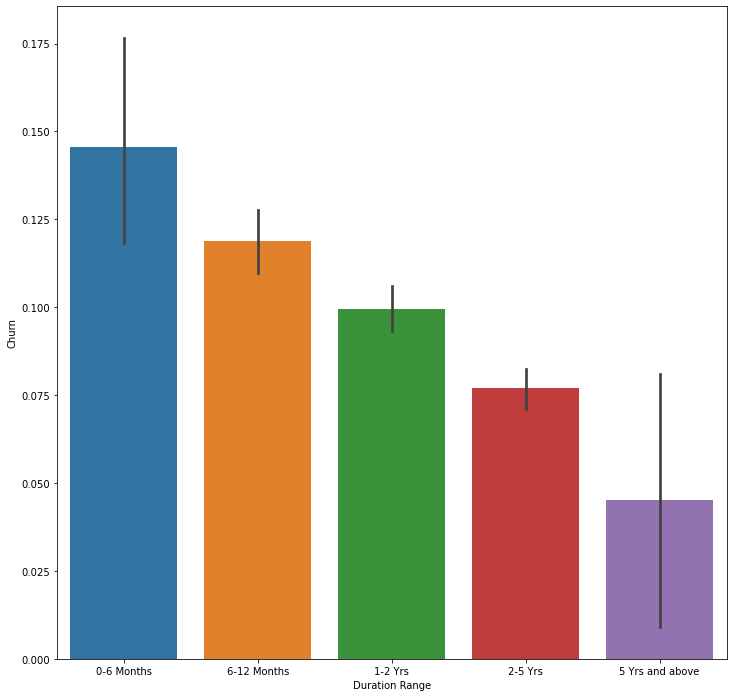

In [66]:
# Plot a bar plot for subscription duration range
plt.figure(figsize=[12,12])
sns.barplot(x='duration_range',y='churn', data=telecom_df)
plt.xlabel("Duration Range")
plt.ylabel("Churn")
plt.show()

We observe that the maximum churn rate occurs during 0-6 month period, after which it gradually decreases which means the customer is retained in the operator network.

In the good phase of customer, the average revenue per user of the customer is given by arpu_6 and arpu_7. As we have two seperate averages, lets take an overall average to these two columns and drop the other columns.

In [67]:
# Calculate the average revenue per user for month 6 and 7 and store in a new column 'avg_arpu_6_7'
telecom_df["avg_arpu_6_7"]= (telecom_df['arpu_6'] + telecom_df['arpu_7'])/2

In [68]:
# check the 'avg_arpu_6_7' column values
telecom_df['avg_arpu_6_7'].head()

0     206.1005
1    1209.5150
2     435.4720
3     556.1030
4     134.1235
Name: avg_arpu_6_7, dtype: float64

In [69]:
# Drop the original columns as new columns are already derived from them
telecom_df.drop(['arpu_6','arpu_7'], axis=1, inplace=True)

In [70]:
# Let us check the updated dimensions of the dataset
telecom_df.shape

(30001, 135)

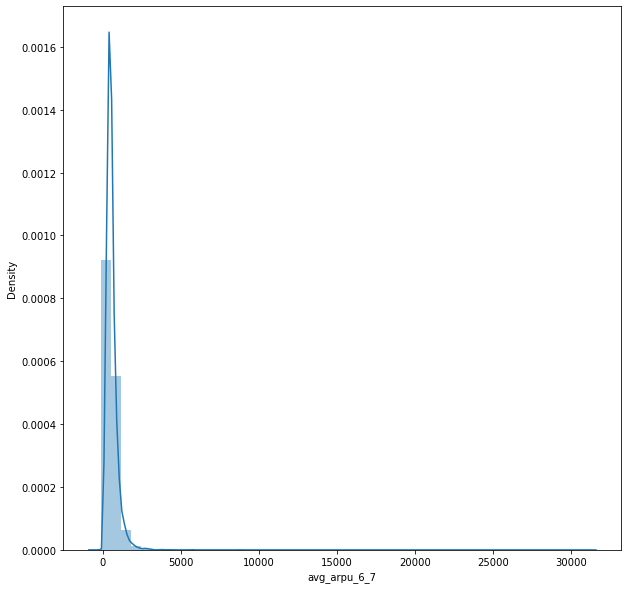

In [71]:
# Plot a distribution plot for visualizing the column 'avg_arpu_6_7'
plt.figure(figsize = (10, 10))
sns.distplot(telecom_df['avg_arpu_6_7'])
plt.show()

We observe that the average revenue per user is not a uniform distribution and right skewed

In [72]:
# Check the correlation with respect to churn and sort them in descending order
churn_corr = telecom_df.corr()[['churn']].sort_values(ascending=False, by='churn')
churn_corr

,churn
churn,1.000000
std_og_mou_6,0.137372
std_og_t2m_mou_6,0.106765
roam_og_mou_7,0.101575
roam_og_mou_8,0.101409
roam_ic_mou_8,0.089059
onnet_mou_6,0.080303
total_og_mou_6,0.078321
roam_ic_mou_7,0.074693
offnet_mou_6,0.073142


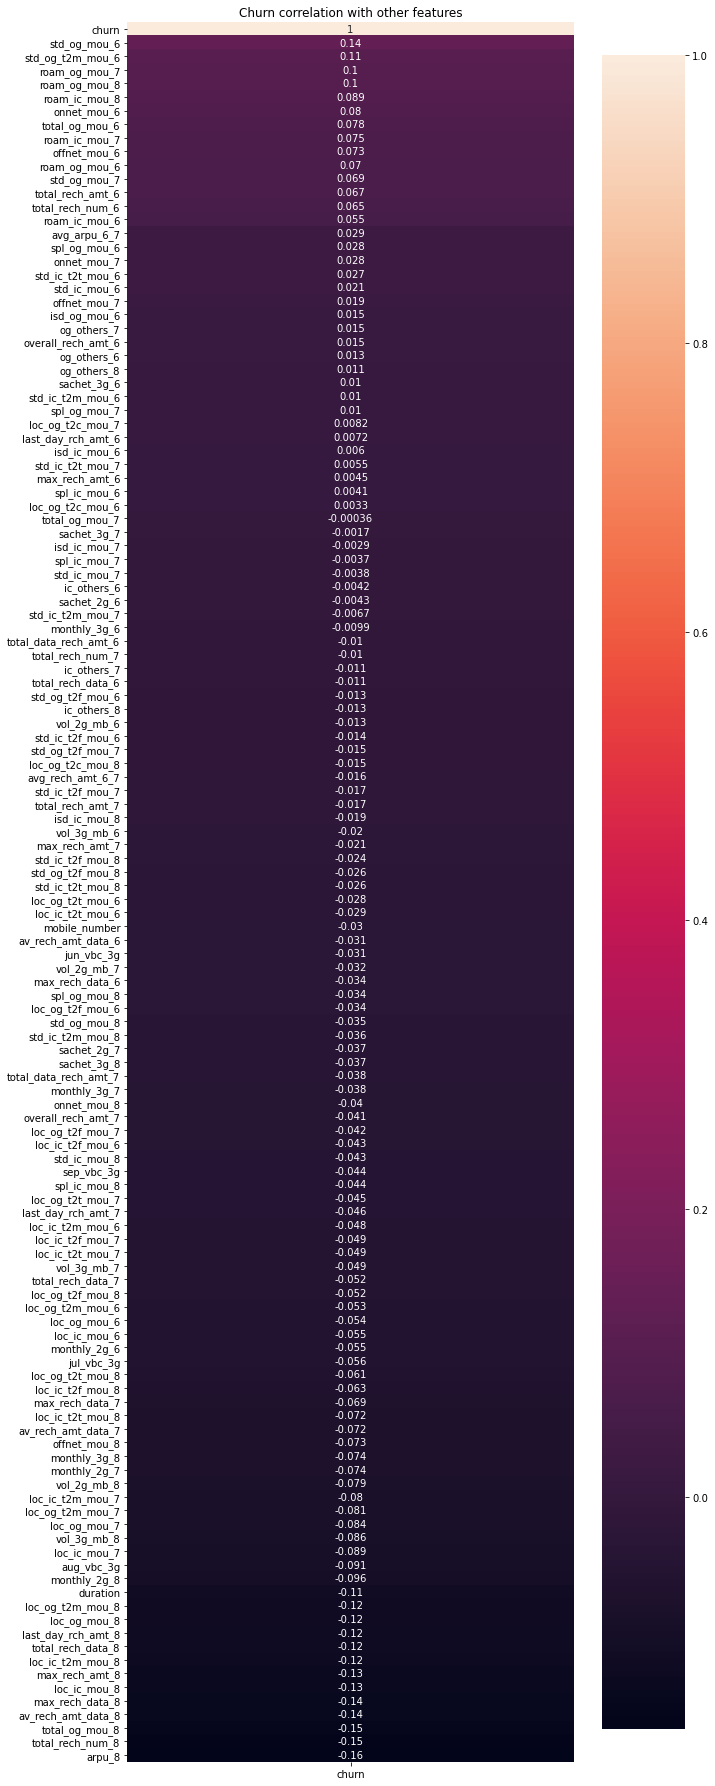

In [73]:
# Plot a heatmap to visually analyze the correlation of churn whith other variables
plt.figure(figsize=(10,32))
sns.heatmap(churn_corr,annot=True).set_title("Churn correlation with other features")
plt.show()

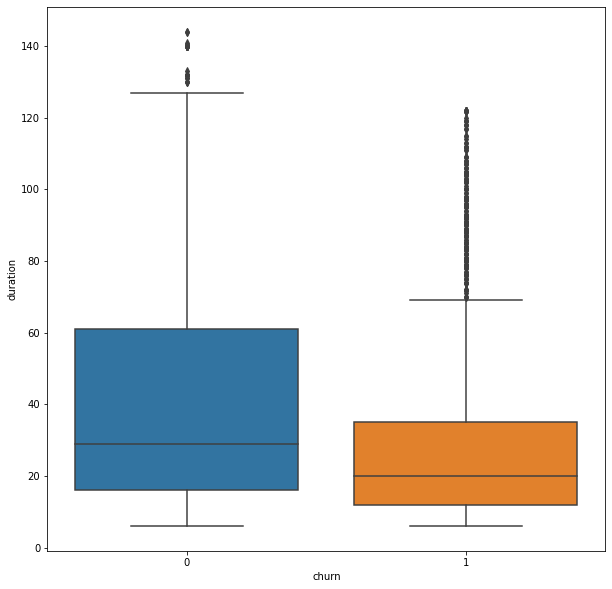

In [74]:
# Draw a box plot between churn and duration
plt.figure(figsize = (10, 10))
sns.boxplot(x = telecom_df["churn"], y = telecom_df["duration"])
plt.show()

From the above plot we observe that customers whose tenure is of longer duration, do not generally churn. We also do observe outliers.

<Figure size 1080x1080 with 0 Axes>

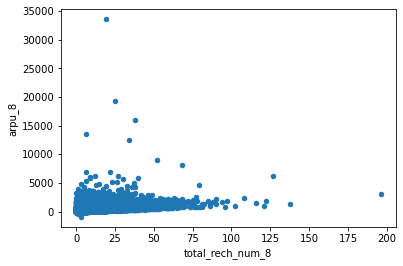

In [75]:
# Draw a scatter plot between total recharge and avg revenue for the 8th month (action phase)
plt.figure(figsize = (15, 15))
telecom_df[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8', y='arpu_8')
plt.show()

We do not observe any significant trend

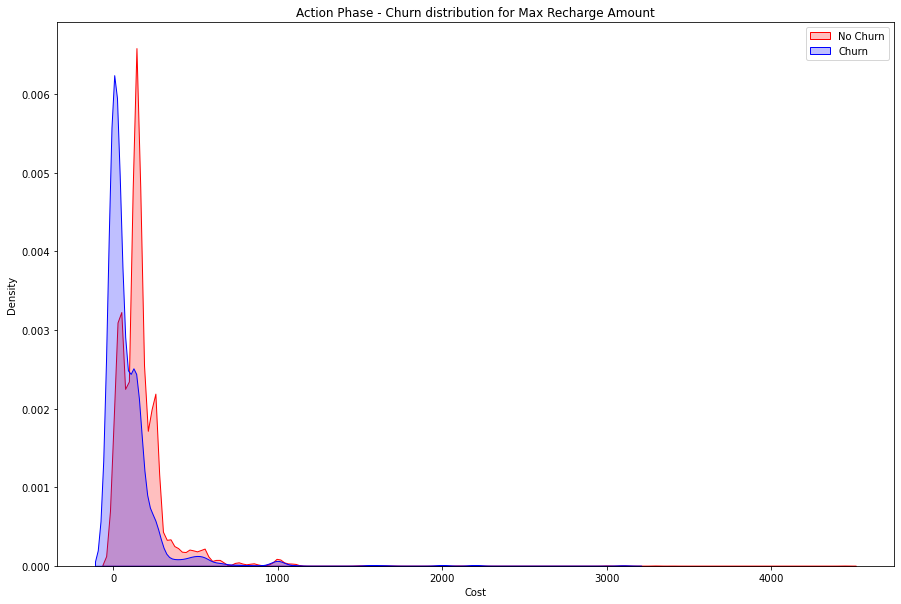

In [76]:
# Plot between churn vs max rechare amount for month 8 (action phase)
max_rech_no_churn = telecom_df["max_rech_amt_8"][(telecom_df["churn"] == 0)]
max_rech_churn = telecom_df["max_rech_amt_8"][(telecom_df["churn"] == 1)]

plt.figure(figsize = (15, 10))
kde = sns.kdeplot(max_rech_no_churn, color="Red", shade = True)
kde = sns.kdeplot(max_rech_churn, ax =kde, color="Blue", shade= True)
kde.legend(["No Churn","Churn"],loc='upper right')
kde.set_ylabel('Density')
kde.set_xlabel('Cost')
kde.set_title('Action Phase - Churn distribution for Max Recharge Amount')
plt.show()